In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import pandas as pd

In [28]:
dados = pd.read_excel("dados_assistente_virtual.xlsx")

In [5]:
dados

,Nome,Idade,Data,Pergunta,Resposta,Assunto,Feedback
0,Luigi,63,2024-07-29 16:46:05,O que é uma dieta equilibrada?,Essa é uma possível resposta para 'O que é uma...,Saúde,Não curti
1,Igor,61,2024-02-29 16:46:05,Como melhorar o sono?,Essa é uma possível resposta para 'Como melhor...,Saúde,Curti
2,Esther,54,2024-12-20 16:46:05,Quais filmes estão em cartaz?,Essa é uma possível resposta para 'Quais filme...,Entretenimento,Curti
3,Guilherme,58,2024-02-05 16:46:05,Como organizar o tempo de estudo?,Essa é uma possível resposta para 'Como organi...,Educação,Curti
4,Vinicius,18,2024-06-03 16:46:05,Quais filmes estão em cartaz?,Essa é uma possível resposta para 'Quais filme...,Entretenimento,Não curti
...,...,...,...,...,...,...,...
995,Ana,31,2024-10-16 16:46:05,O que é blockchain?,Essa é uma possível resposta para 'O que é blo...,Tecnologia,Curti
996,Heitor,58,2024-09-30 16:46:05,Como organizar o tempo de estudo?,Essa é uma possível resposta para 'Como organi...,Educação,Não curti
997,Alícia,38,2024-12-08 16:46:05,O que é uma dieta equilibrada?,Essa é uma possível resposta para 'O que é uma...,Saúde,Não curti
998,Sophie,64,2024-01-08 16:46:05,O que é blockchain?,Essa é uma possível resposta para 'O que é blo...,Tecnologia,Não curti


In [6]:
with open('metadados.txt', 'r', encoding='utf-8') as arquivo:
    metadados =  arquivo.read()

In [9]:
load_dotenv()

api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key = api_key)

In [34]:
system_prompt = f"""
Você é um programador especializado em Python. Seu objetivo é gerar um código Python baseado em um contexto específico. 
A função deve ser chamar response com um único argumento chamada df, que será a base de dados que será aplicada.

    Contexto:
    {metadados}


    Saída esperada:
    O código gerado pode produzir um dos seguintes resultados, conforme solicitado:
        Texto explicativo ou analítico.
        Uma tabela ou conjunto de dados processados.
        Gráficos ilustrativos que ajudem na visualização dos dados.

    Requisitos técnicos:
        Use bibliotecas populares para análise e visualização de dados, como pandas, matplotlib e seaborn.
        Comente o código para que seja compreensível mesmo para um iniciante.
        A saída gráfica ou tabular deve ser salva em um formato de fácil acesso, como CSV para tabelas ou PNG para gráficos.

    Exemplo de aplicação:
        Texto: Gerar um resumo baseado em dados de vendas fornecidos.
        Tabela: Processar dados e calcular estatísticas descritivas (média, mediana, etc.).
        Gráfico: Criar gráficos de linha ou barras para mostrar tendências temporais.

Responda apenas com o código Python que atende ao contexto descrito, sem explicações adicionais.
"""

In [84]:
def chamada_llm(pergunta):
  response = client.chat.completions.create(
    #"o1-mini-2024-09-12"
    #"o1-preview-2024-09-12"
    #"gpt-4o-2024-11-20"
    #"gpt-4o-2024-05-13"
    #"gpt-4o-mini-2024-07-18"
  model="gpt-4o-2024-11-20",
  #reasoning_effort="low",

  messages=[
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": f"Por favor, responda a seguinte pergunta: `{pergunta}`"}
  ]
)
  return response.choices[0].message.content

In [85]:
pergunta = """Me gere um gráfico de barras da quantidade de acessos por mês. Coloque os valores da quantidade em cada barra. 
A cor da barra deve azul se for acima de 75 ou vermelho, caso contrário"""

In [86]:
print(chamada_llm(pergunta))

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def response(df):
    # Convertendo a coluna 'Data' para datetime para facilitar a manipulação
    df['Data'] = pd.to_datetime(df['Data'])
    
    # Extraindo o mês e ano para agrupar por esses valores
    df['Ano_Mes'] = df['Data'].dt.to_period('M')
    
    # Contando a quantidade de interações por mês
    acessos_por_mes = df.groupby('Ano_Mes').size().reset_index(name='Quantidade')
    
    # Convertendo novamente o período 'Ano_Mes' para string para exibição
    acessos_por_mes['Ano_Mes'] = acessos_por_mes['Ano_Mes'].astype(str)
    
    # Criando as cores baseado na quantidade (azul acima de 75, vermelho abaixo ou igual a 75)
    acessos_por_mes['Cor'] = acessos_por_mes['Quantidade'].apply(lambda x: 'blue' if x > 75 else 'red')
    
    # Criando o gráfico de barras
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x='Ano_Mes', y='Quantidade', data=acessos_por_mes, palette=acessos_por_mes['C

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def response(df):
    # Convertendo a coluna 'Data' para datetime para facilitar a manipulação
    df['Data'] = pd.to_datetime(df['Data'])
    
    # Extraindo o mês e ano para agrupar por esses valores
    df['Ano_Mes'] = df['Data'].dt.to_period('M')
    
    # Contando a quantidade de interações por mês
    acessos_por_mes = df.groupby('Ano_Mes').size().reset_index(name='Quantidade')
    
    # Convertendo novamente o período 'Ano_Mes' para string para exibição
    acessos_por_mes['Ano_Mes'] = acessos_por_mes['Ano_Mes'].astype(str)
    
    # Criando as cores baseado na quantidade (azul acima de 75, vermelho abaixo ou igual a 75)
    acessos_por_mes['Cor'] = acessos_por_mes['Quantidade'].apply(lambda x: 'blue' if x > 75 else 'red')
    
    # Criando o gráfico de barras
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x='Ano_Mes', y='Quantidade', data=acessos_por_mes, palette=acessos_por_mes['Cor'])
    
    # Adicionando os valores nas barras
    for i, bar in enumerate(bars.patches):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
                 f"{int(bar.get_height())}", ha='center', fontsize=10)
    
    # Ajustes no gráfico
    plt.title('Quantidade de Acessos por Mês', fontsize=16)
    plt.xlabel('Mês e Ano', fontsize=12)
    plt.ylabel('Quantidade de Acessos', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Salvando o gráfico em formato PNG
    plt.savefig("quantidade_acessos_por_mes.png")
    plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_14352\1814170782.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Ano_Mes', y='Quantidade', data=acessos_por_mes, palette=acessos_por_mes['Cor'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

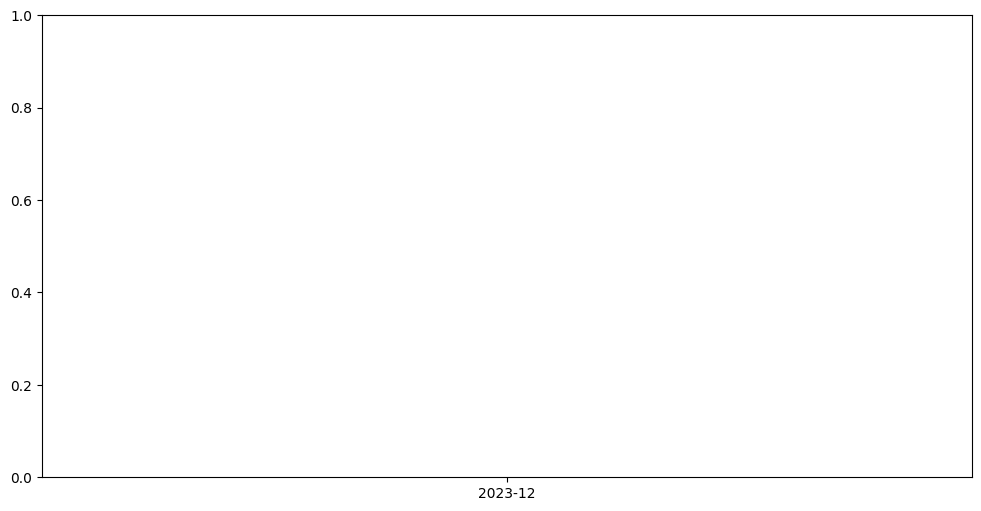

In [88]:
response(dados)